# Klassifikation mit Zahlen: Ziffernerkennung (Digits-Datensatz)

In diesem Notebook schauen wir uns ein **klassisches Klassifikationsbeispiel** an:

- Eingabedaten: handgeschriebene Ziffern (0–9) als **8×8 Pixel-Bild**
- Zielvariable: die **Ziffer (0–9)** – also eine **Klassifikation mit Nummern**
- Ziel: Ein Modell trainieren, das zu einem Bild sagt: *„Das ist eine 3“*, *„Das ist eine 7“* usw.

Wir verwenden dazu eine Python Library `scikit-learn` und den eingebauten **Digits-Datensatz**.


In [9]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression

## 1. Datensatz laden

Wir laden den `digits`-Datensatz aus `sklearn`.  
Jedes Beispiel besteht aus:

- einem **8×8 Bild** (64 Pixel)
- einem **Label** (Zahl von 0 bis 9)


In [10]:
digits = load_digits()

X = digits.data      # Form: (n_samples, 64)
y = digits.target    # Form: (n_samples,)

print("Anzahl Beispiele:", X.shape[0])
print("Dimension eines Beispiels:", X.shape[1])
print("Mögliche Klassen (Zahlen):", np.unique(y))

Anzahl Beispiele: 1797
Dimension eines Beispiels: 64
Mögliche Klassen (Zahlen): [0 1 2 3 4 5 6 7 8 9]


## 2. Beispielbilder und zugehörige Klassen (Nummern)

Wir schauen uns ein paar Bilder mit ihrem **Klassenlabel (0–9)** an.


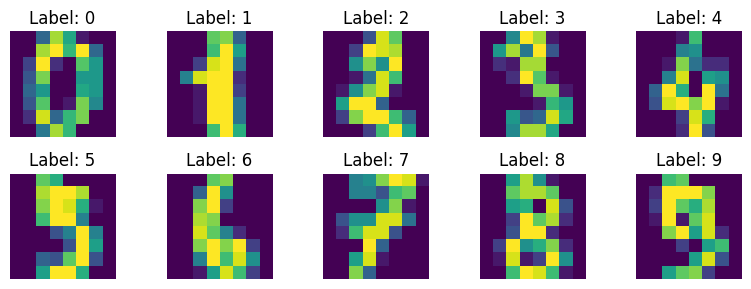

In [11]:
fig, axes = plt.subplots(2, 5, figsize=(8, 3))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(digits.images[i], interpolation='nearest')
    axes[i].set_title(f"Label: {y[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## 4. Klassifikationsmodell: Logistische Regression

Wir verwenden ein **multinomiales logistisches Regressionsmodell**.  
Das Modell lernt, für jedes Beispiel die Wahrscheinlichkeit für jede Klasse (0–9) zu bestimmen und wählt dann die Klasse mit der höchsten Wahrscheinlichkeit.


In [12]:
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

print("Modell wurde trainiert.")

Modell wurde trainiert.


## 5. Vorhersage

Nachfolgend sehen Sie wie gut das Modell die gelernten Bilder voraussagen kann.


In [15]:
for i in range(5):
    print("Wahr:", y[i], "→ Modell sagt:", model.predict([X[i]])[0])

Wahr: 0 → Modell sagt: 0
Wahr: 1 → Modell sagt: 1
Wahr: 2 → Modell sagt: 2
Wahr: 3 → Modell sagt: 3
Wahr: 4 → Modell sagt: 4
